In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


In [2]:

# Завантаження датасету MNIST (зображення рукописних цифр)
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [3]:

# Нормалізація та перетворення розміру
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0

# Перетворення міток у one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [4]:
X_train.shape

(60000, 28, 28, 1)

In [5]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(10000, 10))

In [6]:

# Побудова CNN-моделі
model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 класів (цифри 0-9)
])

# Компільовуємо модель
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


c:\Users\Techer314\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:

# Навчання моделі
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9108 - loss: 0.2861 - val_accuracy: 0.9855 - val_loss: 0.0433
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9871 - loss: 0.0432 - val_accuracy: 0.9885 - val_loss: 0.0350
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9916 - loss: 0.0275 - val_accuracy: 0.9894 - val_loss: 0.0347
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9938 - loss: 0.0203 - val_accuracy: 0.9900 - val_loss: 0.0326
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9950 - loss: 0.0145 - val_accuracy: 0.9916 - val_loss: 0.0263


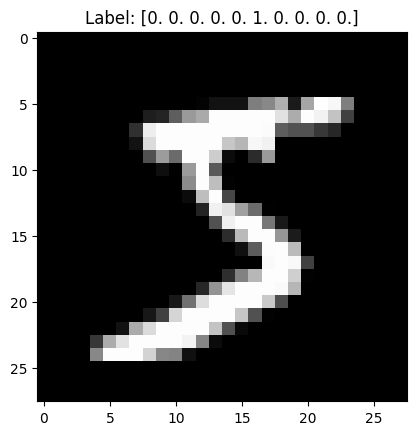

In [8]:
import matplotlib.pyplot as plt
# Display the first image
plt.imshow(X_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

In [21]:
ind = 700

In [22]:
# Select an image to classify (e.g., first test image)
img = X_test[ind]  

# Preprocess the image
img = img.reshape(-1, 28, 28, 1) / 255.0

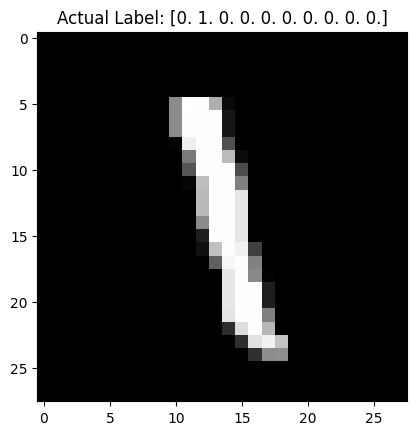

In [23]:
# Display the image
plt.imshow(X_test[ind], cmap="gray")
plt.title(f"Actual Label: {y_test[ind]}")
plt.show()

In [24]:
import numpy as np
# Predict the digit
prediction = model.predict(img)

prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


array([[0.10916077, 0.11202148, 0.0997895 , 0.08501656, 0.10344907,
        0.09348598, 0.09153015, 0.10459054, 0.11583328, 0.08512262]],
      dtype=float32)

In [25]:

# Get the predicted class
predicted_digit = np.argmax(prediction, axis=1)

print(f"Predicted Digit: {predicted_digit}")


Predicted Digit: [8]
